# preprocessing csv file "sales_data_missing"

loading libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

loading dataset

In [42]:
df= pd.read_csv("sales_data_missing.csv")

checking if dataset is fully loaded

In [3]:
df.head(10)

,store_id,customer_id,product_id,product_category,date,amount,single_price,transaction_id
0,Store 01,Customer 1508,53642,Toys,4/1/2007 8:09,3.0,90.246230,1
1,Store 15,Customer 169,90945,Movies,2/15/2005 10:47,2.0,60.586312,2
2,Store 12,Customer 124,18548,Movies,9/27/2007 5:38,5.0,96.612695,3
3,Store 05,Customer 1988,85359,Books,5/7/2005 13:19,5.0,16.962671,4
4,Store 01,Customer 475,80069,Clothing,1/6/2008 17:36,5.0,65.215310,5
5,Store 11,Customer 761,55848,Sports,6/3/2006 21:09,3.0,56.474787,6
6,Store 10,Customer 741,11762,Health,9/19/2006 23:09,NaN,26.872870,7
7,Store 10,Customer 1842,75667,NaN,11/29/2008 1:59,7.0,67.074635,8
8,Store 11,Customer 1066,97291,Health,3/21/2006 20:01,3.0,47.245561,9
9,Store 14,Customer 566,39580,Toys,9/5/2005 5:14,8.0,42.668956,10


In [4]:
df.tail(10)

,store_id,customer_id,product_id,product_category,date,amount,single_price,transaction_id
90,Store 09,Customer 1086,82289,Toys,9/16/2005 11:12,3.0,74.034278,91
91,Store 02,Customer 1392,60439,Sports,1/7/2006 10:25,1.0,57.897507,92
92,Store 04,Customer 1217,83854,Sports,8/15/2006 20:28,6.0,91.716713,93
93,Store 05,Customer 749,27085,NaN,6/22/2005 18:47,8.0,13.680240,94
94,Store 06,Customer 1291,83573,Sports,1/23/2006 13:07,4.0,94.352229,95
95,Store 10,Customer 711,86284,Toys,5/23/2005 16:11,8.0,93.641214,96
96,Store 13,Customer 776,15381,Health,11/17/2006 0:55,2.0,81.335683,97
97,Store 14,Customer 1996,47830,Electronics,2/1/2008 18:44,3.0,54.128274,98
98,Store 12,Customer 1511,32795,Home/Garden,7/6/2005 17:24,6.0,97.923186,99
99,Store 09,Customer 836,14932,Movies,4/26/2006 17:36,1.0,44.794200,100


# Analysing the dataset

In [5]:
df.columns

Index(['store_id', 'customer_id', 'product_id', 'product_category', 'date',
       'amount', 'single_price', 'transaction_id'],
      dtype='object')

In [6]:
df.dtypes

store_id             object
customer_id          object
product_id            int64
product_category     object
date                 object
amount              float64
single_price        float64
transaction_id        int64
dtype: object

# chekcking missing values

In [7]:
df.isnull().sum()

store_id            0
customer_id         0
product_id          0
product_category    6
date                0
amount              6
single_price        0
transaction_id      0
dtype: int64

# Applying subplots for histogram plots 

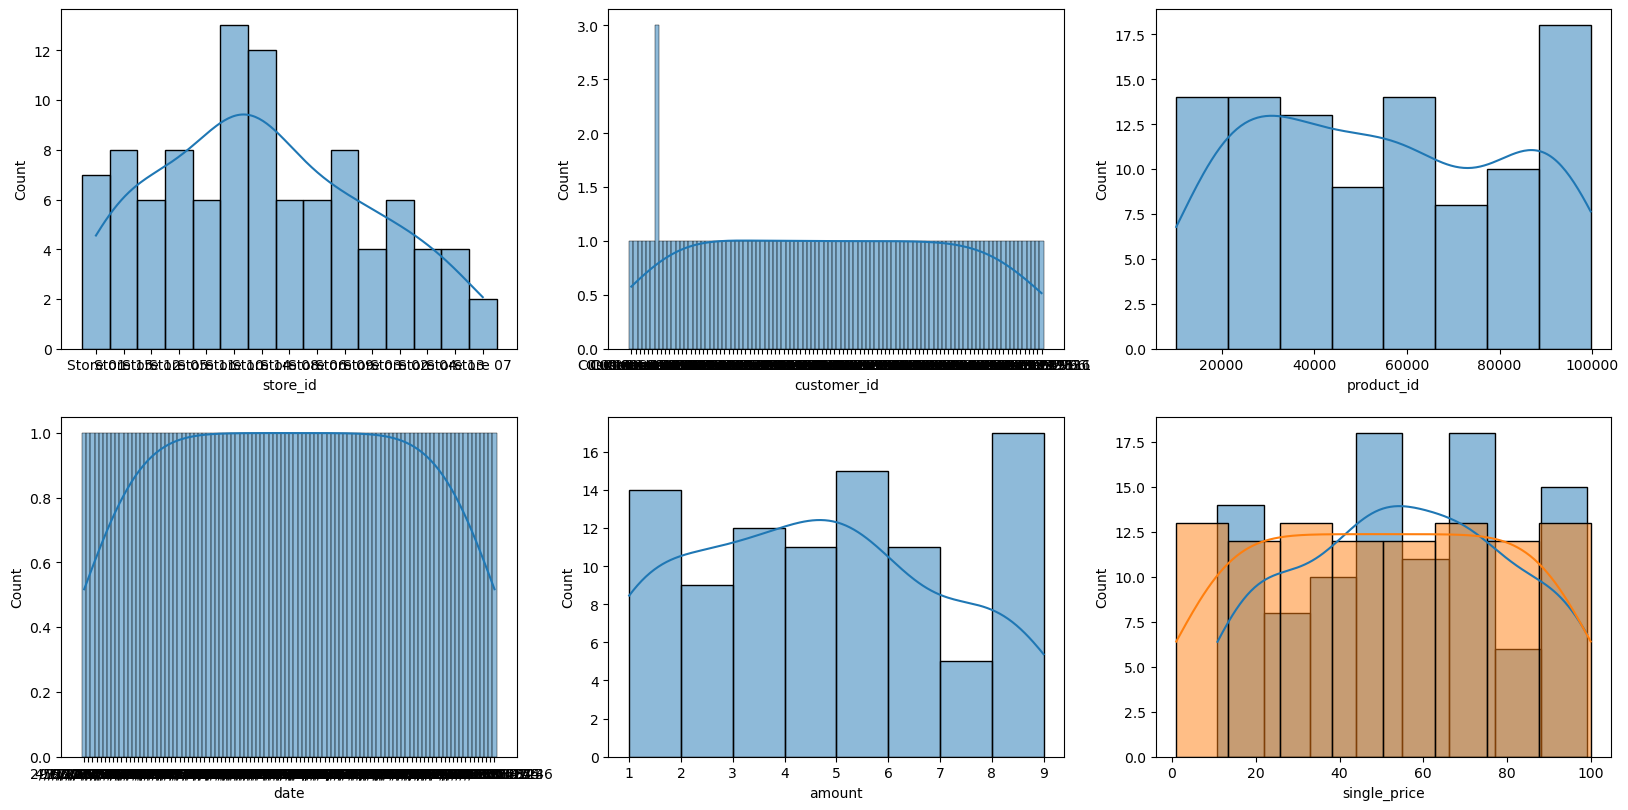

In [8]:
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
sns.histplot(df['store_id'], kde=True)
plt.subplot(3, 3, 2)
sns.histplot(df['customer_id'], kde=True)
plt.subplot(3, 3, 3)
sns.histplot(df['product_id'], kde=True)
plt.subplot(3, 3, 4)
sns.histplot(df['date'], kde=True)
plt.subplot(3, 3, 5)
sns.histplot(df['amount'], kde=True)
plt.subplot(3, 3, 6)
sns.histplot(df['single_price'], kde=True)
plt.subplot(3, 3, 6)
sns.histplot(df['transaction_id'], kde=True)

plt.show()

# Applying correlation matrix

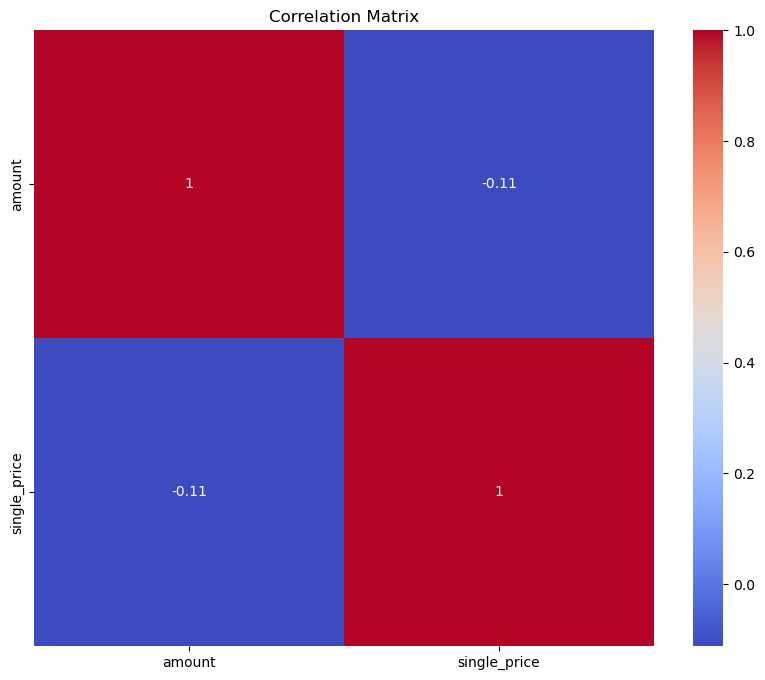

In [9]:
# Calculate the correlation matrix for relevant numerical attributes
numerical_columns = ['amount', 'single_price']  # Only include numerical columns
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# count plot

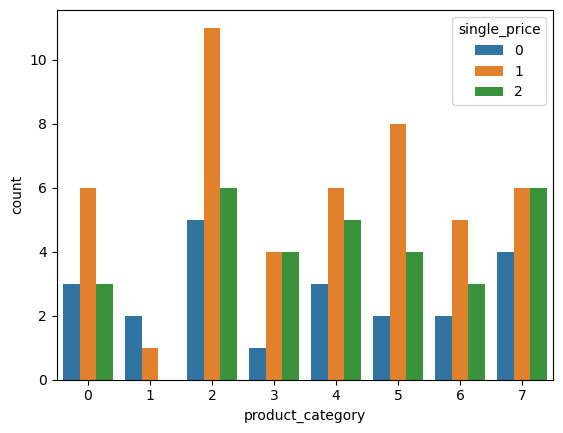

In [39]:
count_plot=sns.countplot(x=df.product_category, hue=df.single_price)


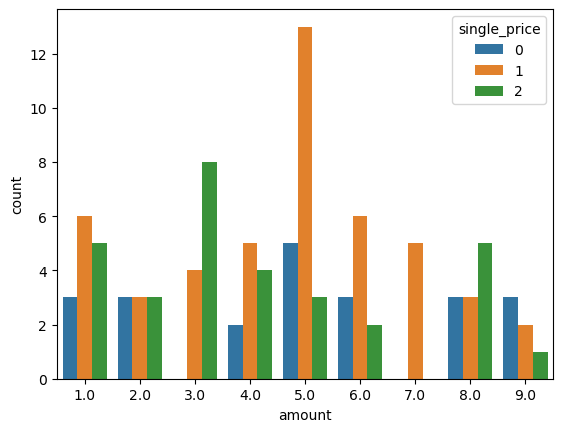

In [40]:
count_plot=sns.countplot(x=df.amount, hue=df.single_price)

# analysing data and find outlier

using boxplot for misisng values columns: to see if the column should be filled with median or mean?

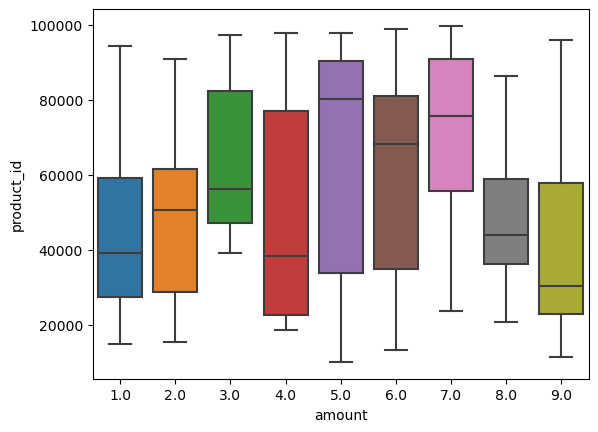

In [11]:
plt.figsize=(10,6)
box_plot= sns.boxplot(x= df.amount, y=df.product_id, data= df)

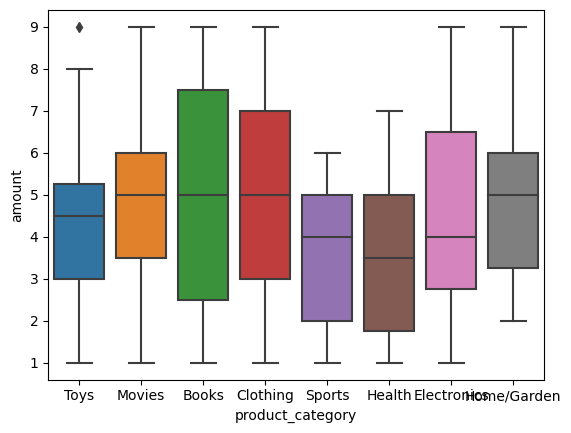

In [12]:
plt.figsize=(10,6)
box_plot= sns.boxplot(x= df.product_category, y=df.amount, data= df)

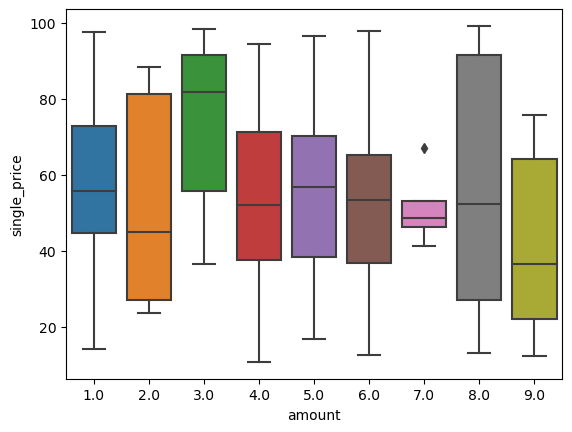

In [13]:

plt.figsize=(10,6)
box_plot= sns.boxplot(x= df.amount, y=df.single_price, data= df)

In [14]:
#Filling missing values of amount 

In [15]:
print("Mean of amount is:" , df.amount.mean())

Mean of amount is: 4.574468085106383


In [16]:
print("Median of amount is:" , df.amount.median())

Median of amount is: 5.0


In [17]:
# filling with median
df['amount'] = df['amount'].fillna(df['amount'].median())
df['amount']

0     3.0
1     2.0
2     5.0
3     5.0
4     5.0
     ... 
95    8.0
96    2.0
97    3.0
98    6.0
99    1.0
Name: amount, Length: 100, dtype: float64

In [18]:
#checking if there is null value in amount know or not
missing=df['amount'].isnull().sum()
missing

0

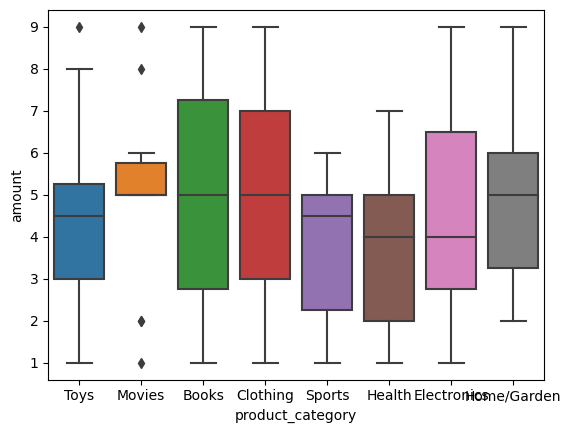

In [19]:
plt.figsize=(10,6)
box_plot= sns.boxplot(x= df.product_category, y=df.amount, data= df)

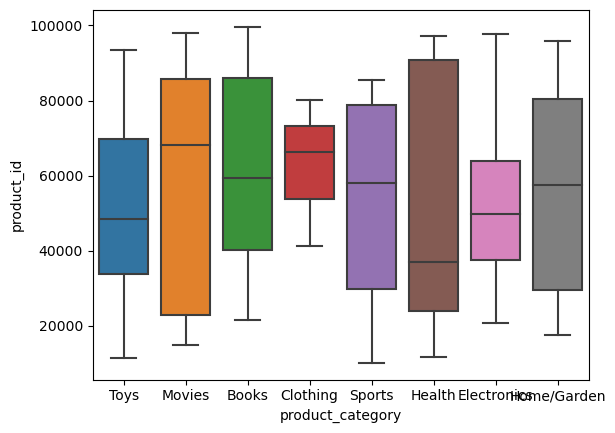

In [20]:
plt.figsize=(10,6)
box_plot= sns.boxplot(x= df.product_category, y=df.product_id, data= df)

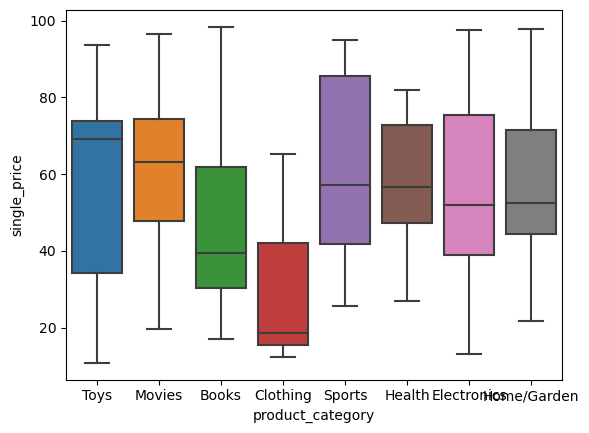

In [21]:
plt.figsize=(10,6)
box_plot= sns.boxplot(x= df.product_category, y=df.single_price, data= df)

In [22]:
#filling missing value of product_category wiht mode

In [23]:
df['product_category'] = df['product_category'].fillna(df['product_category'].mode()[0])
df['product_category']

0            Toys
1          Movies
2          Movies
3           Books
4        Clothing
         ...     
95           Toys
96         Health
97    Electronics
98    Home/Garden
99         Movies
Name: product_category, Length: 100, dtype: object

In [24]:
#checking if there is null value in amount know or not
missing=df['product_category'].isnull().sum()
missing

0

# Dealing with unnecessary columns

In [25]:
useless_columns=['store_id','customer_id','transaction_id','date']
df.drop(columns=useless_columns, errors='ignore', inplace=True)                

In [26]:
#checking columns names after deleting etc columns
df.columns

Index(['product_id', 'product_category', 'amount', 'single_price'], dtype='object')

In [27]:
df.dtypes

product_id            int64
product_category     object
amount              float64
single_price        float64
dtype: object

# converting  "product_category" column from "object" to  numerical datatype

In [28]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Apply label encoding to the 'product_category' column
df['product_category'] = le.fit_transform(df['product_category'])


In [29]:
#checking after converting product_category into numeric form
df.head(5)

,product_id,product_category,amount,single_price
0,53642,7,3.0,90.246230
1,90945,5,2.0,60.586312
2,18548,5,5.0,96.612695
3,85359,0,5.0,16.962671
4,80069,1,5.0,65.215310


# Converting 'single_price' column from continuous to discrete


In [30]:
#cheking the lowest and highest values of 'single_price' column
df['single_price'] = df['single_price'].astype(int)

print(df['single_price'].min())  # Minimum value
print(df['single_price'].max())  # Maximum value


10
99


In [31]:
df['single_price'] = df['single_price'].astype(int)   #conveting into numric from float

# Define a function to bucketize single_price
def bucketize_price(price):
   
    if price <= 30:
        return 0  # Low Price
    elif price <= 70:
        return 1  # Medium Price
    elif price <= 100:
        return 2  # High Price
    else:
        return -1  # Out of expected range

# Apply the function to the 'single_price' column
df['single_price'] = df.single_price.apply(bucketize_price)




In [32]:
#checking after converting 'single_price' column from continuous to discrete
df.head(5)

,product_id,product_category,amount,single_price
0,53642,7,3.0,2
1,90945,5,2.0,1
2,18548,5,5.0,2
3,85359,0,5.0,0
4,80069,1,5.0,1


In [33]:
df.tail(5)

,product_id,product_category,amount,single_price
95,86284,7,8.0,2
96,15381,3,2.0,2
97,47830,2,3.0,1
98,32795,4,6.0,2
99,14932,5,1.0,1


# Converting this preprocessing into a csv file

In [34]:
df.to_csv(r'C:\Users\PC\OneDrive\Documents\Sahab Mushtaq\BSAI-05\sales_processed.csv', index=False)
